## **MKT 7317 Problem Set 1**

#### Jin Miao jxm190071@utdallas.edu

Before getting into start working on this problem set, among other things, please get yourselves familiarized with (i) how to use **@jit** of the **numba** library, and (ii) how to parallelize your code in Python using **joblib**:

In [176]:
from joblib import Parallel, delayed
import time
def f(x):
    time.sleep(2)
    return x**2
results = Parallel(n_jobs=8)(delayed(f)(i) for i in range(10))
results

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

## _1 (Python) Calculating the OLS Estimator for a Multiple Regression_

(a) Load **“cps09mar.csv”** into memory (use either polars or pandas)

In [177]:
from numba import njit
import numpy as np
import pandas as pd
data = pd.read_csv("/home/bizmia/Desktop/Joonhwi/Task1/cps09mar.csv")
data

,age,female,hisp,education,earnings,hours,week,union,uncov,region,race,marital
0,52,0,0,12,146000,45,52,0,0,1,1,1
1,38,0,0,18,50000,45,52,0,0,1,1,1
2,38,0,0,14,32000,40,51,0,0,1,1,1
3,41,1,0,13,47000,40,52,0,0,1,1,1
4,42,0,0,13,161525,50,52,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
50737,58,1,0,11,30000,40,52,0,0,4,4,6
50738,62,1,0,16,35000,40,52,0,0,4,4,6
50739,58,0,0,12,75000,50,52,0,0,4,1,1
50740,45,1,0,12,40000,60,52,0,0,4,1,1


(b) Generate a column of ones, and generate a variable **log_wage** by taking natural loga-
rithm of the variable earnings.

In [178]:
data['ones'] = 1
data['log_wage'] = np.log(data.earnings)
data

,age,female,hisp,education,earnings,hours,week,union,uncov,region,race,marital,ones,log_wage
0,52,0,0,12,146000,45,52,0,0,1,1,1,1,11.891362
1,38,0,0,18,50000,45,52,0,0,1,1,1,1,10.819778
2,38,0,0,14,32000,40,51,0,0,1,1,1,1,10.373491
3,41,1,0,13,47000,40,52,0,0,1,1,1,1,10.757903
4,42,0,0,13,161525,50,52,1,0,1,1,1,1,11.992415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50737,58,1,0,11,30000,40,52,0,0,4,4,6,1,10.308953
50738,62,1,0,16,35000,40,52,0,0,4,4,6,1,10.463103
50739,58,0,0,12,75000,50,52,0,0,4,1,1,1,11.225243
50740,45,1,0,12,40000,60,52,0,0,4,1,1,1,10.596635


(c) Extract the data matrices **y**, **X** as numpy array.

In [179]:
y = data.log_wage.to_numpy()
print(y)
print(type(y))
X = data[['ones','female','education', 'hours']].to_numpy()
print(X)
print(type(X))

[11.8913619  10.81977828 10.37349118 ... 11.22524339 10.59663473
 11.00209984]
<class 'numpy.ndarray'>
[[ 1  0 12 45]
 [ 1  0 18 45]
 [ 1  0 14 40]
 ...
 [ 1  0 12 50]
 [ 1  1 12 60]
 [ 1  0 11 40]]
<class 'numpy.ndarray'>


Now Consider the population regression function:
$$y_i = x_i^{i} \beta + \mu_i$$
where $y_i$ corresponds to the log_wage variable and $x_i$ corresponds to a constant and female,
education, hours variables in the data.

(d) Find the sample size $n$ of this data and column rank $k$ of the matrix $Xs$

In [180]:
n = len(y)
print(n)
k = X.shape[1]
print(k)

50742
4


(e) Calculate the OLS estimator $\hat \beta$ for $\beta$ using the usual closed-form formula 
$$ \hat \beta = (X^{'}X)^{-1} X^{'}y $$

In [181]:
beta_hat = np.linalg.inv( np.transpose(X) @ X ) @ np.transpose(X) @ y
print(beta_hat)

[ 8.57636643 -0.27818095  0.11322532  0.0143364 ]


(e) Calculate the prediction $\hat y_i = x_i^{'} \beta$ for each given sample point $x_i$. Save the prediction
$\hat y = (\hat y_1, \hat y_2, ..., \hat y_n )^{'}$ in memory for future use in the following steps.

In [182]:
y_hat = X @ beta_hat
y_hat

array([10.58020828, 11.25956018, 10.73497691, ..., 10.65189029,
       10.51707335, 10.39530096])

(g) Calculate the residual $\hat \mu_i = y_i - x_i^{'} \hat \beta$ for each given sample point $x_i$. Save the residual vector $\hat{\mu} = (\hat \mu_1, \hat \mu_2, ..., \hat \mu_n )^{'}$ in memory for future use in the following steps.

In [183]:
mu_hat = y - y_hat
mu_hat

array([ 1.31115362, -0.43978189, -0.36148573, ...,  0.5733531 ,
        0.07956139,  0.60679888])

(h) Calculate the standard error of the regression using only basic arithmetic operations and basic matrix
operations

$$ \sqrt{s^2} = \sqrt{ \frac{\mu^{'} \mu}{n - k} } $$

In [184]:
se = np.sqrt(np.transpose(mu_hat) @ mu_hat /(n - k))
se

0.5946986423377512

(i) Calculate $Est.Var \bigg( \hat \beta \bigg| \{ x_k \}_{k = 1}^n \bigg)$ , the estimated covariance matrix of $\hat \beta$ given data, using only basic arithmetic operations and basic matrix operations.

$$ Est.Var \bigg( \hat \beta \bigg| \{ x_k \}_{k = 1}^n \bigg) = s^2 (X^{'}X)^{-1} $$

In [185]:
EstVar = np.diag([se**2] * k) @ np.linalg.inv( np.transpose(X) @ X )
print(EstVar)

[[ 3.80316414e-04 -2.20563037e-05 -1.08539202e-05 -4.85588278e-06]
 [-2.20563037e-05  2.94610568e-05 -3.63149841e-07  3.32459841e-07]
 [-1.08539202e-05 -3.63149841e-07  9.47326121e-07 -4.98008451e-08]
 [-4.85588278e-06  3.32459841e-07 -4.98008451e-08  1.23389119e-07]]


(j) Calculate the **Total Sum of Squares (TSS), Explained Sum of Squares (ESS), Residual
Sum of Squares (RSS)** using only basic arithmetic operations and basic matrix operations.

$$TSS = \sum_{i = 1}^n (y_i - \bar y)^2 $$
$$RSS = \sum_{i = 1}^n (\hat y_i - \bar y)^2 $$
$$ESS = \sum_{i = 1}^n (y_i - \hat y)^2 $$

In [186]:
y_mean = np.sum(y) / n
TSS = np.sum((y - y_mean)**2)
print(TSS)
RSS = np.sum((y_hat - y_mean)**2)
print(RSS)
ESS = np.sum((y - y_hat)**2)
print(ESS)

24960.672254528137
7016.342635913588
17944.329618614618


(k) Calculate $R^2$. Verify that the following is true:
$$ \frac{ESS}{TSS} = 1 - \frac{RSS}{TSS} $$

$R^2 = \frac{RSS}{TSS} = 0.2811$

In [187]:
RSS / TSS

0.2810959001571261

In [188]:
ESS / TSS

0.7189040998428767

In [189]:
1 - RSS / TSS

0.718904099842874

(l) Numerically calculate $\sum_{i = 1}^n \hat \mu_i $ and $\sum_{i = 1}^n \hat \mu_i x_i $. Compare your results with the theoretical
results.

_Theoretical Results_

$\sum_{i = 1}^n \hat \mu_i = \sum_{i = 1}^n (y_i - \hat y_i) = \sum_{i = 1}^n (y_i - x_i^{'} \hat \beta) = 0 $


$\sum_{i = 1}^n \hat \mu_i x_i = \sum_{i = 1}^n (y_i - \hat y_i) x_i = X^{'} \bigg(y - X(X^{'}X)^{-1}X^{'}y \bigg) = 0 $

_Numerical Results_

In [190]:
np.sum(mu_hat)

-7.379838962151553e-10

In [191]:
out = np.transpose(X) * mu_hat
out.sum(axis = 1)

array([-7.37983896e-10, -6.00280714e-10, -1.10322844e-08, -3.40678525e-08])

(m) Construct the t-statistic corresponding to $H_0: c^{'} \beta = 0$ vs. $H_1: c^{'} \beta \neq 0$ for the
following $c$s, respectively, and calculate the corresponding p-values.

$$ c = 
\begin{pmatrix}
1 \\ 
0 \\
0 \\
0
\end{pmatrix}, 
c = 
\begin{pmatrix}
0 \\ 
1 \\
0 \\
0
\end{pmatrix}, 
c = 
\begin{pmatrix}
0 \\ 
0 \\
1 \\
0
\end{pmatrix}, 
c = 
\begin{pmatrix}
0 \\ 
0 \\
0 \\
1
\end{pmatrix}
$$

Denote $ \beta = 
\begin{pmatrix}
\beta_1 \\ 
\beta_2 \\
\beta_3 \\
\beta_4
\end{pmatrix}
$, we have the limiting distribution of $c^{'} \hat \beta$ under $H_0$ as

$$ 
c^{'} \hat \beta \rightarrow^{d} N \bigg(0, c^{'}  EstVar(\hat \beta) c \bigg)
$$

The corresponding t-statistics are 

$$ t_i = \frac{\hat \beta_i}{ se(\hat \beta_i)}, i \in \{ 1, 2, 3, 4 \} $$
where the standard error of the corresponding estimates are calculated from the diagonal elements of the estimated variance-covariance matrix. 

In [192]:
t_0 = beta_hat[0] / np.sqrt(EstVar[0,0])
t_1 = beta_hat[1] / np.sqrt(EstVar[1,1])
t_2 = beta_hat[2] / np.sqrt(EstVar[2,2])
t_3 = beta_hat[3] / np.sqrt(EstVar[3,3])

The corresponding p-values are shown as follows:

In [193]:
from scipy.stats import norm
p_0 = 2 * (1 - norm.cdf( np.abs(t_0)))
p_1 = 2 * (1 - norm.cdf( np.abs(t_1)))
p_2 = 2 * (1 - norm.cdf( np.abs(t_2)))
p_3 = 2 * (1 - norm.cdf( np.abs(t_3)))

In [194]:
print('t-statistic = %6.3f p-value = %6.4f' % (t_0, p_0))
print('t-statistic = %6.3f p-value = %6.4f' % (t_1, p_1))
print('t-statistic = %6.3f p-value = %6.4f' % (t_2, p_2))
print('t-statistic = %6.3f p-value = %6.4f' % (t_3, p_3))

t-statistic = 439.775 p-value = 0.0000
t-statistic = -51.251 p-value = 0.0000
t-statistic = 116.331 p-value = 0.0000
t-statistic = 40.813 p-value = 0.0000


(n) Construct the t-statistic corresponding to $H_0: c^{'} \beta = 1$ vs. $H_1: c^{'} \beta \neq 1$ for the
following $c$ and calculate the corresponding p-values.

$$c = 
\begin{pmatrix}
1 \\ 
1 \\
1 \\
1
\end{pmatrix}
$$

Given $ c = 
\begin{pmatrix}
1 \\ 
1 \\
1 \\
1
\end{pmatrix}
$, we have the limiting distribution of $c^{'} \hat \beta$ under $H_0$ as

$$ 
c^{'} \hat \beta \rightarrow^{d} N \bigg(0, c^{'}  EstVar(\hat \beta) c \bigg)
$$

The corresponding t-statistic is 

$$ t = \frac{c^{'} \hat \beta}{ \sqrt{c^{'}  EstVar(\hat \beta) c} } $$


In [195]:
c = np.ones(4)
se = np.sqrt(c @ EstVar @ np.transpose(c))
t = c @ beta_hat / se

The corresponding p-value is

In [196]:
p = 2 * (1 - norm.cdf( np.abs(t)))
print('t-statistic = %6.3f p-value = %6.4f' % (t, p))

t-statistic = 460.241 p-value = 0.0000


(o) Now consider minimizing the objective function numerically using IPOPT:

$$ \min_{\beta} \sum_{i = 1}^n (y_i - x_i^{'} \beta)^2$$

Solve the following problem numerically with cyIPOPT by **(i) supplying only objective function and gradient to cyIPOPT**

In [197]:
import cyipopt

class ols:

    def __init__(self):
        pass

    def objective(self, beta):
        #
        # The callback for calculating the objective
        #
        return np.transpose(y - X @ beta) @ (y - X @ beta)

    def gradient(self, beta):
        #
        # The callback for calculating the gradient
        #
        return -2 * np.transpose(X) @ y + 2 * np.transpose(X) @ X @ beta

    def intermediate(
            self,
            alg_mod,
            iter_count,
            obj_value,
            inf_pr,
            inf_du,
            mu,
            d_norm,
            regularization_size,
            alpha_du,
            alpha_pr,
            ls_trials
            ):

        #
        # Example for the use of the intermediate callback.
        #
        print("Objective value at iteration #%d is - %g" % (iter_count, obj_value))


def main():
    #
    # Define the problem
    #
    x0 = [0.0, 0.0, 0.0, 0.0]

    # lb = [1.0, 1.0, 1.0, 1.0]
    # ub = [5.0, 5.0, 5.0, 5.0]

    cl = []
    # cu = []

    nlp = cyipopt.Problem(
        n=len(x0),
        m=len(cl),
        problem_obj=ols(),
        # lb=lb,
        # ub=ub,
        # cl=cl,
        # cu=cu
        )

    #
    # Set solver options
    #
    #nlp.addOption('derivative_test', 'second-order')
    nlp.add_option('mu_strategy', 'adaptive')
    nlp.add_option('tol', 1e-7)
    nlp.add_option('linear_solver', 'ma57')
    nlp.add_option('hessian_approximation', 'limited-memory')
    
    #
    # Scale the problem (Just for demonstration purposes)
    #
    nlp.set_problem_scaling(
        obj_scaling=2,
        x_scaling=[1, 1, 1, 1]
        )
    nlp.add_option('nlp_scaling_method', 'user-scaling')

    #
    # Solve the problem
    #
    x, info = nlp.solve(x0)

    print("Solution of the primal variables: x=%s\n" % repr(x))
    print("Solution of the dual variables: lambda=%s\n" % repr(info['mult_g']))
    print("Objective=%s\n" % repr(info['obj_val']))

if __name__ == '__main__':
    main()


Objective value at iteration #0 is - 5.79418e+06
Objective value at iteration #1 is - 2.47222e+06
Objective value at iteration #2 is - 136348
Objective value at iteration #3 is - 134232
Objective value at iteration #4 is - 86137.6
Objective value at iteration #5 is - 85868.6
Objective value at iteration #6 is - 34961.8
Objective value at iteration #7 is - 30985.8
Objective value at iteration #8 is - 18713.6
Objective value at iteration #9 is - 18631.3
Objective value at iteration #10 is - 17991
Objective value at iteration #11 is - 17957.4
Objective value at iteration #12 is - 17945.6
Objective value at iteration #13 is - 17944.8
Objective value at iteration #14 is - 17944.6
Objective value at iteration #15 is - 17944.6
Objective value at iteration #16 is - 17944.4
Objective value at iteration #17 is - 17944.3
Objective value at iteration #18 is - 17944.3
Objective value at iteration #19 is - 17944.3
Objective value at iteration #20 is - 17944.3
Objective value at iteration #21 is - 17

Solve the following problem numerically with cyIPOPT by **(ii) supplying objective function, gradient, hessian althogether respectively**

In [198]:
import cyipopt

class ols:

    def __init__(self):
        pass

    def objective(self, beta):
        #
        # The callback for calculating the objective
        #
        return np.transpose(y - X @ beta) @ (y - X @ beta)

    def gradient(self, beta):
        #
        # The callback for calculating the gradient
        #
        return - 2 * np.transpose(X) @ y + 2 * np.transpose(X) @ X @ beta

    def hessianstructure(self):
        return np.nonzero(np.tril(np.ones((4, 4))))

    def hessian(self, beta, lagrange, obj_factor):
        #
        # The callback for calculating the Hessian
        #
        
        H = 2 * np.transpose(X) @ X 
        row, col = self.hessianstructure()
        return H[row, col]

    def intermediate(
            self,
            alg_mod,
            iter_count,
            obj_value,
            inf_pr,
            inf_du,
            mu,
            d_norm,
            regularization_size,
            alpha_du,
            alpha_pr,
            ls_trials
            ):

        #
        # Example for the use of the intermediate callback.
        #
        print("Objective value at iteration #%d is - %g" % (iter_count, obj_value))


def main():
    #
    # Define the problem
    #
    x0 = [0.0, 0.0, 0.0, 0.0]

    # lb = [1.0, 1.0, 1.0, 1.0]
    # ub = [5.0, 5.0, 5.0, 5.0]

    cl = []
    # cu = []

    nlp = cyipopt.Problem(
        n=len(x0),
        m=len(cl),
        problem_obj=ols(),
        # lb=lb,
        # ub=ub,
        # cl=cl,
        # cu=cu
        )

    #
    # Set solver options
    #
    #nlp.addOption('derivative_test', 'second-order')
    nlp.add_option('mu_strategy', 'adaptive')
    nlp.add_option('tol', 1e-7)
    nlp.add_option('linear_solver', 'ma57')
    nlp.add_option('hessian_approximation', 'exact')
    #
    # Scale the problem (Just for demonstration purposes)
    #
    nlp.set_problem_scaling(
        obj_scaling=2,
        x_scaling=[1, 1, 1, 1]
        )
    nlp.add_option('nlp_scaling_method', 'user-scaling')

    #
    # Solve the problem
    #
    x, info = nlp.solve(x0)

    print("Solution of the primal variables: x=%s\n" % repr(x))

    print("Solution of the dual variables: lambda=%s\n" % repr(info['mult_g']))

    print("Objective=%s\n" % repr(info['obj_val']))


if __name__ == '__main__':
    main()


Objective value at iteration #0 is - 5.79418e+06
Objective value at iteration #1 is - 17944.3
Solution of the primal variables: x=array([ 8.57636643, -0.27818095,  0.11322532,  0.0143364 ])

Solution of the dual variables: lambda=array([], dtype=float64)

Objective=17944.32961861461



**The estimation results coincide. However, the provision of Hession matrix enables the estimation procedure to be completed using 1 iteration whereas no-Hession procedure takes 32 iterations.**

## _2 (Python) (Weak) Law of Large Numbers_

(a) Consider a continuous random variable $X_i \sim Uniform[0,2]$. What is $E[X_i]$ and $Var[X_i]$?

$$
E[X_i] = 1
$$
$$
Var[X_i] = \frac{1}{3}
$$

(b) Consider the $X_i$ defined above in (a) for $i = 1, 2, ..., n$, where each $X_i$ is uncorrelated with $X_j$ whenever $i \neq j$. Consider the sample mean

$$\bar X_n = \frac{1}{n} \sum_{i = 1}^n X_i$$

What is $E[\bar X_n]$ and $Var[\bar X_n]$?

$$
E[\bar X_n] = E[\frac{1}{n} \sum_{i = 1}^n X_i] = \frac{1}{n} \sum_{i = 1}^n E[X_i] = 1
$$
$$
Var[\bar X_n] = Var[\frac{1}{n} \sum_{i = 1}^n X_i] = \frac{1}{n^2} Var[\sum_{i = 1}^n X_i] = \frac{1}{n^2} \sum_{i = 1}^n Var[X_i] = \frac{1}{3n}
$$

Now repeat the following (c) -- (e) for $n = 1, 2, 3, 5, 10, 50, 100, 1000, 3000$. Parallelize your routine
for (c)-(e) using **joblib**.

(c) (Python) Generate a size n vector of independent $Uniform[0,2]$ random variables and
calculate its sample mean $\bar X_n$.

In [202]:
Parallel(n_jobs = 4)(delayed(np.mean)(np.random.uniform(low = 0.0, high = 2.0, size = n)) for n in [1, 2, 3, 5, 10, 50, 100, 1000, 3000])

[0.23700990312419234,
 0.9287228907270717,
 0.9614672161966524,
 1.0519055349825774,
 0.7352147871891596,
 0.878974132248808,
 1.0902189407515335,
 1.0141290614417477,
 0.9958350111843529]

In [203]:
from joblib import Parallel, delayed
def g(n):
    X = np.random.uniform(low = 0.0, high = 2.0, size = n) 
    return np.mean(X)
Parallel(n_jobs = 4)(delayed(g)(i) for i in [1, 2, 3, 5, 10, 50, 100, 1000, 3000])

[0.798938365441866,
 0.28536055294718665,
 1.210166898595735,
 1.4627921626164124,
 0.7927251909490873,
 0.9779048924362114,
 0.9231634599995876,
 0.9691426995493573,
 0.9877025668562412]

(d) (Python) Take $| \bar X_n - E[X_i] |$ and report the value.

In [204]:
from joblib import Parallel, delayed
def g(n):
    X = np.random.uniform(low = 0.0, high = 2.0, size = n) 
    return np.abs(np.mean(X) - 1)
Parallel(n_jobs = 4)(delayed(g)(i) for i in [1, 2, 3, 5, 10, 50, 100, 1000, 3000])

[0.6754987380311257,
 0.118853917572451,
 0.177149215536072,
 0.08768715711326647,
 0.05391815806395206,
 0.053251674907906055,
 0.040582349403843754,
 0.02376211502847858,
 0.002013663224222917]

(e) (Python) Now consider a continuous transformation


$$f(x) = 2 x^2 - 5x + 1 + \frac{1}{3x}$$

Take $| f(\bar X_n) - f(E[X_i]) |$ and report the value.

In [205]:
from joblib import Parallel, delayed
def g(n):
    def f(x):
        return 2 * x**2 - 5 * x + 1 + 1/(3 * x)
    X = np.random.uniform(low = 0.0, high = 2.0, size = n) 
    return np.abs(f(np.mean(X)) - f(1))
Parallel(n_jobs = 4)(delayed(g)(i) for i in [1, 2, 3, 5, 10, 50, 100, 1000, 3000])

[0.07673946798156495,
 0.19080970951523746,
 0.004462752105667489,
 0.05901304198339585,
 0.438068823796278,
 0.046071299221586814,
 0.06754462524888694,
 0.01107952586752381,
 0.02130998699206499]

(f) What happens to the reported value in (d) and (e) as n increases? Discuss.

$| \bar X_n - E[X_i] |$ converges to 0 as n increases. 

$| f(\bar X_n) - f(E[X_i]) |$ converges to 0 as n increases. 

## _3 (Python) Central Limit Theorem_

(a) Consider a continuous random variable $X_i \sim Uniform[0,2]$. What is $E[X_i]$ and $Var[X_i]$?

$$
E[X_i] = 1
$$
$$
Var[X_i] = \frac{1}{3}
$$

(b) Consider the $X_i$ defined above in (a) for $i = 1, 2, ..., n$, where each $X_i$ is uncorrelated with $X_j$ whenever $i \neq j$. Consider the sample mean

$$\bar X_n = \frac{1}{n} \sum_{i = 1}^n X_i$$

What is $E[\bar X_n]$ and $Var[\bar X_n]$?

$$
E[\bar X_n] = E[\frac{1}{n} \sum_{i = 1}^n X_i] = \frac{1}{n} \sum_{i = 1}^n E[X_i] = 1
$$
$$
Var[\bar X_n] = Var[\frac{1}{n} \sum_{i = 1}^n X_i] = \frac{1}{n^2} Var[\sum_{i = 1}^n X_i] = \frac{1}{n^2} \sum_{i = 1}^n Var[X_i] = \frac{1}{3n}
$$

(c) Consider the transformation

$$Y_n = \sqrt{n} (\bar X_n - E[X_i]) $$

What is $E[Y_n]$ and $Var[Y_n]$?

$$
E[Y_n] = E[\sqrt{n} (\bar X_n - E[X_i])] = \sqrt{n} E[(\bar X_n - E[X_i])]  = 0
$$
$$
Var[Y_n] = Var[\sqrt{n} (\bar X_n - E[X_i])] = n Var[\bar X_n] = \frac{1}{3}
$$

(d) Consider the transformation

$$Z_n = \sqrt{n} \frac{\bar X_n - E[X_i]}{\sqrt{Var[X_i]}} $$

What is $E[Z_n]$ and $Var[Z_n]$?

$$
E[Z_n] = E\bigg[\sqrt{n} \frac{\bar X_n - E[X_i]}{\sqrt{Var[X_i]}} \bigg] = E\bigg[\sqrt{n} \frac{\bar X_n - 1}{\sqrt{ \frac{1}{3} }} \bigg] = 0
$$
$$
Var[Z_n] = Var\bigg[\sqrt{n} \frac{\bar X_n - E[X_i]}{\sqrt{Var[X_i]}} \bigg] = 3n Var[\bar X_n - 1] = 1
$$

Now repeat the following for $n = 1, 2, 3, 5, 10, 50, 100, 1000, 3000$. Parallelize your routine
for (e)-(m) using **joblib**.

(e) (Python) Generate $t = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ..., 2500$ $n × 1$ vectors of independent
$Uniform[0,2]$ random variables and calculate its sample mean $\bar X_n^t$ respectively for each $t$.
Denote this size 2500 vector as
$$v_n^{2500} = \bigg( \bar X_n^1, \bar X_n^2, ..., \bar X_n^{2500} \bigg)$$
for now.

In [206]:
from joblib import Parallel, delayed
def g(n):
    X = np.random.uniform(low = 0.0, high = 2.0, size = n) 
    v = [0] * 2500
    for i in range(2500):
        v[i] = np.mean( np.random.uniform(low = 0.0, high = 2.0, size = n) )
    return v
Parallel(n_jobs = 4)(delayed(g)(i) for i in [1, 2, 3, 5, 10, 50, 100, 1000, 3000])

[[0.9167862548019365,
  0.12795695943769658,
  1.981992697737679,
  1.7745778522924727,
  1.6482376109443773,
  0.5902471803547906,
  1.226673056158882,
  0.2274397184512824,
  1.6211225056927023,
  0.9164209212111787,
  0.2660472009186614,
  1.5846210601826793,
  0.8034959913732491,
  1.0804164638048306,
  1.6982654090674871,
  0.7217429201622771,
  0.23575673311643053,
  1.3201495515494186,
  1.0838584860152993,
  1.812634080985746,
  0.1187909774718694,
  0.6814066139017327,
  1.7140287464548376,
  0.14828107440351657,
  1.7124492378960796,
  1.2175350097736415,
  0.9571828313067101,
  1.6885049414510036,
  0.6695660874899847,
  1.332420922741657,
  0.20196245441505,
  0.6006163770371595,
  1.7645461134169584,
  0.48766770194645837,
  1.7738082098584271,
  1.3856047198058197,
  1.122670174726311,
  0.7972545108046307,
  0.4517685271339946,
  0.6949933309360166,
  1.1643621273529634,
  1.8116144393047076,
  0.570399792403173,
  0.37609495379500535,
  0.7075063293628503,
  1.127927667

(f) (Python) Calculate the mean and variance of $v^{2500}$ and report.

In [207]:
from joblib import Parallel, delayed
def g(n):
    X = np.random.uniform(low = 0.0, high = 2.0, size = n) 
    v = [0] * 2500
    for i in range(2500):
        v[i] = np.mean( np.random.uniform(low = 0.0, high = 2.0, size = n) )
    return ('n = %6.0f mean = %6.6f variance = %6.6f' % (n, np.mean(v), np.var(v)))
Parallel(n_jobs = 4)(delayed(g)(i) for i in [1, 2, 3, 5, 10, 50, 100, 1000, 3000])

['n =      1 mean = 0.991369 variance = 0.323016',
 'n =      2 mean = 1.000693 variance = 0.163699',
 'n =      3 mean = 0.995351 variance = 0.109535',
 'n =      5 mean = 0.995659 variance = 0.066726',
 'n =     10 mean = 0.999660 variance = 0.032802',
 'n =     50 mean = 0.997763 variance = 0.006963',
 'n =    100 mean = 0.999977 variance = 0.003287',
 'n =   1000 mean = 1.000643 variance = 0.000322',
 'n =   3000 mean = 1.000204 variance = 0.000110']

**This numerical output is consistent with the theoretical results from (b).**

(g) (Python) Recall that each element of $v_n^{2500}$ is composed of $\bar X_n^t$ for $t = 1, ..., 2500$. Now,
for each $t = 1, 2, ..., 2500$, take the transformation
$$
Y_n^t = \sqrt{n} (\bar X_n^t - E[X_i]) 
$$
and denote the transformed vector as
$$
y_n^{2500} = \bigg( Y_n^1, Y_n^2, ..., Y_n^{2500}   \bigg)
$$
That is, subtract the $E [ X_i ]$ (that you calculated in (a)) from each element of $v_n^{2500}$, and then
multiply it by $\sqrt{n}$, and then denote it by $y_n^{2500}$.

In [208]:
from joblib import Parallel, delayed
def g(n):
    X = np.random.uniform(low = 0.0, high = 2.0, size = n) 
    y = [0] * 2500
    for i in range(2500):
        y[i] = (np.mean( np.random.uniform(low = 0.0, high = 2.0, size = n) ) - 1) * np.sqrt(n)
    return y
Parallel(n_jobs = 4)(delayed(g)(i) for i in [1, 2, 3, 5, 10, 50, 100, 1000, 3000])

[[-0.27955763579219983,
  -0.8845205161907428,
  0.9172120934337449,
  0.9827016212153155,
  -0.21419257280673132,
  -0.049554541769504024,
  -0.4203113583017959,
  -0.3756139050967042,
  -0.6128047900320543,
  -0.6687015490150348,
  -0.44848050631481384,
  0.49638735756335506,
  -0.7423561088217039,
  -0.06895566496644245,
  0.7931878956232736,
  -0.11399901749408503,
  -0.620791433762091,
  0.6198103651220916,
  0.6522182926049354,
  -0.8097463527803452,
  0.38132394045919926,
  0.7737450557228249,
  -0.11518154646576706,
  -0.0587404058671801,
  0.8167012895912282,
  -0.6697391168874494,
  0.7216312663570004,
  0.44393112623992703,
  -0.08521768331899993,
  0.9256317665511522,
  0.02059873148956526,
  0.6175768066395473,
  0.4121573082374601,
  -0.979246835278992,
  -0.4397656299650383,
  0.6983250466202637,
  -0.7140715599964307,
  -0.38416773118233793,
  -0.7205615476387184,
  0.5550068425427095,
  -0.7625864732255212,
  -0.8011857944655854,
  0.027269202653754654,
  0.63784195134

(h) (Python) Calculate the mean and variance of $y^{2500}$ and report.

In [209]:
from joblib import Parallel, delayed
def g(n):
    X = np.random.uniform(low = 0.0, high = 2.0, size = n) 
    y = [0] * 2500
    for i in range(2500):
        y[i] = (np.mean( np.random.uniform(low = 0.0, high = 2.0, size = n) ) - 1) * np.sqrt(n)
    return ('n = %6.0f mean = %6.6f variance = %6.6f' % (n, np.mean(y), np.var(y)))
Parallel(n_jobs = 4)(delayed(g)(i) for i in [1, 2, 3, 5, 10, 50, 100, 1000, 3000])

['n =      1 mean = 0.001789 variance = 0.341138',
 'n =      2 mean = 0.005558 variance = 0.321225',
 'n =      3 mean = 0.016558 variance = 0.343252',
 'n =      5 mean = 0.012121 variance = 0.347708',
 'n =     10 mean = 0.022166 variance = 0.327321',
 'n =     50 mean = 0.013738 variance = 0.325908',
 'n =    100 mean = 0.005828 variance = 0.354728',
 'n =   1000 mean = 0.011604 variance = 0.330414',
 'n =   3000 mean = -0.005550 variance = 0.337025']

**This numerical output is consistent with the theoretical results from (c).**

(i) (Python) Plot the histogram of $y^{2500}$ and report.

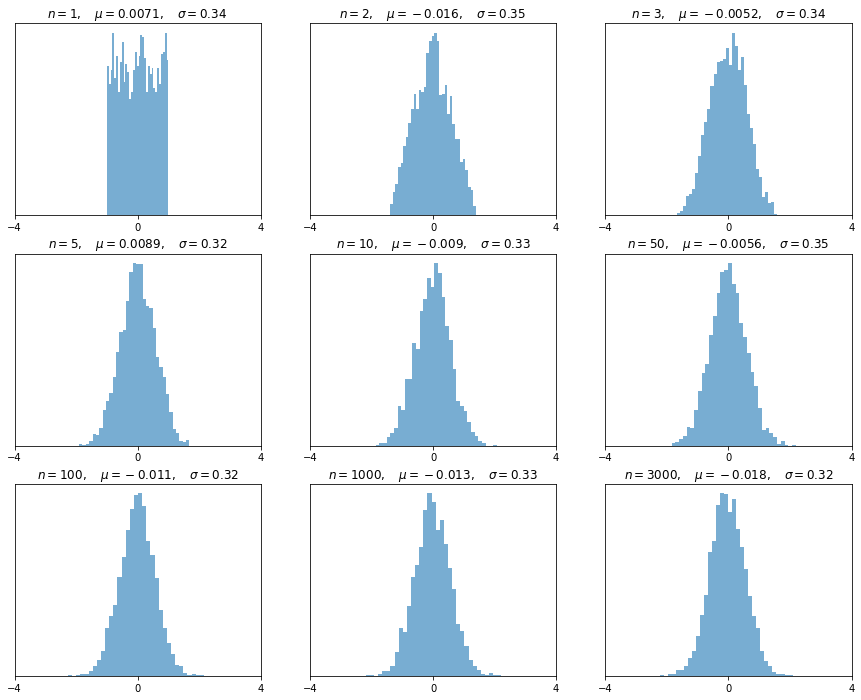

In [210]:
num_rows, num_cols = 3, 3
SizeList = [1, 2, 3, 5, 10, 50, 100, 1000, 3000]
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
for i in range(num_cols):
    for j in range(num_rows):
        index = i + 3 * j
        
        X = np.random.uniform(low = 0.0, high = 2.0, size = SizeList[index]) 
        y = [0] * 2500
        for k in range(2500):
            y[k] = (np.mean( np.random.uniform(low = 0.0, high = 2.0, size = SizeList[index]) ) - 1) * np.sqrt(SizeList[index])
        
        axes[j,i].hist(y, alpha = 0.6, bins = 33)
        t = f'$n = {SizeList[index]}, \quad \mu = {np.mean(y):.2}, \quad \sigma = {np.var(y):.2}$'
        axes[j,i].set(title = t, xticks = [-4, 0, 4], yticks = [])

plt.show()

(j) (Python) Recall that each element of $v_n^{2500}$ is composed of $\bar X_n^t$ for $t = 1, ..., 2500$. Now,
take the transformation
$$
Z_n^t = \sqrt{n} \frac{\bar X_n^t - E[X_i]}{\sqrt{Var(X_i)}}
$$
and denote the transformed vector as $z_n^{2500}$. 
That is, subtract the $E [ X_i ]$ (that you calculated in (a)) from each element of $v_n^{2500}$, and then
multiply it by $\sqrt{n}$, and divide it by $\sqrt{Var(X_i)}$ ($\sqrt{Var(X_i)}$ you calculated in (a)) , and then denote it by 
$$
z_n^{2500} = \bigg(Z_n^1, Z_n^2, ..., Z_n^{2500}\bigg)
$$.

In [211]:
from joblib import Parallel, delayed
def g(n):
    X = np.random.uniform(low = 0.0, high = 2.0, size = n) 
    y = [0] * 2500
    for i in range(2500):
        y[i] = (np.mean( np.random.uniform(low = 0.0, high = 2.0, size = n) ) - 1) * np.sqrt(3 * n)
    return y
Parallel(n_jobs = 4)(delayed(g)(i) for i in [1, 2, 3, 5, 10, 50, 100, 1000, 3000])

[[-0.9492193175025385,
  0.8238296661710403,
  -1.6026303157529882,
  1.4394188292507737,
  -0.41258622037535064,
  1.2262599308968958,
  1.6617189543072082,
  0.17764155917782684,
  1.1881247217997353,
  -0.9297985130069778,
  0.5785900208550561,
  -0.3163018561331011,
  1.4372710967910725,
  -1.0991118603814467,
  1.3843942764023913,
  -0.00436111748912834,
  1.2918133926197997,
  0.784972306055855,
  0.7700298411825597,
  -1.4420615342973127,
  -0.11952213187881043,
  0.23938682603028272,
  1.7304580485609877,
  -1.3559555722764818,
  -0.44392522430704945,
  1.134435205536587,
  0.48477259549321217,
  -0.8368388068198716,
  1.101848886542142,
  1.187423876022525,
  1.5590622911217453,
  0.5885218090553933,
  -1.2871855212129941,
  1.1821716674906233,
  -0.6505889724158841,
  -1.461701786120518,
  0.04179198097433984,
  -1.218220943987303,
  -1.1403060841700754,
  1.5730123775176537,
  1.194371438936283,
  1.2971591555267754,
  -0.58235923917365,
  1.210981241555135,
  1.276928762737

(k) (Python) Calculate the mean and variance of $z^{2500}$ and report.

In [212]:
from joblib import Parallel, delayed
def g(n):
    X = np.random.uniform(low = 0.0, high = 2.0, size = n) 
    y = [0] * 2500
    for i in range(2500):
        y[i] = (np.mean( np.random.uniform(low = 0.0, high = 2.0, size = n) ) - 1) * np.sqrt(3 * n)
    return ('n = %6.0f mean = %6.6f variance = %6.6f' % (n, np.mean(y), np.var(y)))
Parallel(n_jobs = 4)(delayed(g)(i) for i in [1, 2, 3, 5, 10, 50, 100, 1000, 3000])

['n =      1 mean = -0.006261 variance = 0.950762',
 'n =      2 mean = -0.027606 variance = 0.992596',
 'n =      3 mean = 0.026348 variance = 0.983935',
 'n =      5 mean = 0.011212 variance = 0.999807',
 'n =     10 mean = -0.024864 variance = 0.972053',
 'n =     50 mean = -0.026182 variance = 0.989772',
 'n =    100 mean = 0.010940 variance = 0.957336',
 'n =   1000 mean = -0.004140 variance = 0.994656',
 'n =   3000 mean = 0.016825 variance = 0.977373']

**This numerical output is consistent with the theoretical results from (d).**

(l) (Python) Plot the histogram of $z^{2500}$ and report.

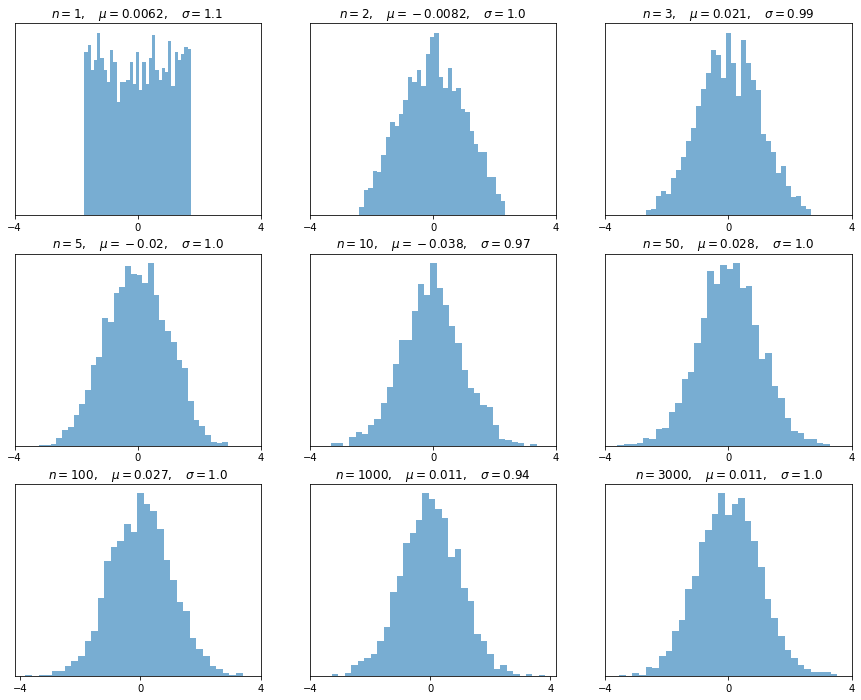

In [213]:
num_rows, num_cols = 3, 3
SizeList = [1, 2, 3, 5, 10, 50, 100, 1000, 3000]
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
for i in range(num_rows):
    for j in range(num_cols):
        index = i + 3 * j
        
        X = np.random.uniform(low = 0.0, high = 2.0, size = SizeList[index]) 
        y = [0] * 2500
        for k in range(2500):
            y[k] = (np.mean( np.random.uniform(low = 0.0, high = 2.0, size = SizeList[index]) ) - 1) * np.sqrt(3 * SizeList[index])
        
        axes[j,i].hist(y, alpha = 0.6, bins = 33)
        t = f'$n = {SizeList[index]}, \quad \mu = {np.mean(y):.2}, \quad \sigma = {np.var(y):.2}$'
        axes[j,i].set(title = t, xticks = [-4, 0, 4], yticks = [])

plt.show()

(m) What happens to the reported values in (f), (h), (k) and histograms in (i) and (l) as n
increases? Discuss.

**(f) $v^{2500} = \bigg( \bar X_n^1, \bar X_n^2, ..., \bar X_n^{2500} \bigg)$ converges to the mass point of $E[\bar X_n] = 1$ as n increases.**

**(h) $y_n^{2500} = \bigg( Y_n^1, Y_n^2, ..., Y_n^{2500} \bigg)$ converges to $N(0, \frac{1}{3})$ as n increases.**

**(k) $z_n^{2500} = \bigg(Z_n^1, Z_n^2, ..., Z_n^{2500}\bigg)$ converges to $N(0, 1)$ as n increases.**

**(i) (l) The simulated distributions get smoother and closer to the limiting Normal distributions as n increases.** 


## _4 (Python) WLLN with Simple Regression_##

In this exercise, you will generate datasets for simple regression yourself, and then try to estimate the model parmaters to examine the properties of simple regression OLS estimators as the sample size $n$ grows.

Repeat the following for $n = 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 50, 75, 100, 250, 500, 1000, 2000, 3000$.
Parallelize your routine for (a)-(e) using **joblib**.

(a) (Python) Generate a $n × 1$ column vector of $Uniform[0, 12]$ random variable and denote it as $x$.

In [215]:
from joblib import Parallel, delayed
def g(n):
    X = np.random.uniform(low = 0.0, high = 12.0, size = n) 
    return X
Parallel(n_jobs = 4)(delayed(g)(i) for i in [2,3,4,5,6,7,8,9,10,15,20,30,50,75,100,250,500,1000,2000,3000])

[array([8.81190882, 1.50673648]),
 array([9.51033859, 6.06035059, 5.73711136]),
 array([ 2.36551013,  0.52612059, 10.48174606,  3.2332866 ]),
 array([ 6.04892487, 11.19126625,  5.85503608,  0.45483764,  2.14230177]),
 array([10.10323477,  4.8803529 ,  0.39318037,  8.99544136,  3.74224883,
        11.82902582]),
 array([6.64453708, 9.86774537, 2.19714166, 8.26039483, 1.48648152,
        0.01408081, 9.82606097]),
 array([8.37198085, 9.38108363, 9.74334524, 4.63429334, 7.8551294 ,
        1.67169627, 6.39209801, 6.63247649]),
 array([ 4.05926623,  1.73883165,  8.91317353,  0.92820247, 11.17518404,
         9.6366028 ,  3.02974326, 10.10537417,  4.96959122]),
 array([ 9.00331341,  5.21894026,  8.32935628,  9.99154639,  4.38721113,
         5.42094537,  4.23160331, 11.50905489,  1.49295459,  5.2729051 ]),
 array([ 2.85250707,  0.41853165,  9.40024362, 10.92987381,  3.6912349 ,
         5.93039945,  9.40449001, 10.60109756, 11.52713409,  6.78025912,
         0.5488781 ,  9.38461733,  2.80889

(b) (Python) Generate a $n × 1$ column vector of $Uniform[− 4,4]$ random variable and denote it as $u$.

In [216]:
from joblib import Parallel, delayed
def g(n):
    u = np.random.uniform(low = -4.0, high = 4.0, size = n) 
    return u
Parallel(n_jobs = 4)(delayed(g)(i) for i in [2,3,4,5,6,7,8,9,10,15,20,30,50,75,100,250,500,1000,2000,3000])

[array([-2.95167594, -0.16018201]),
 array([ 2.9106619 , -2.15492048, -3.43123457]),
 array([ 1.91576176, -3.60599053, -2.31870165,  0.76979001]),
 array([ 1.8010865 ,  0.97903995, -0.61241902, -3.21799463,  1.97767627]),
 array([ 1.07028299,  3.89798879,  0.23961086,  0.1979431 , -3.02163828,
        -2.65066661]),
 array([-0.88562999, -1.77537868,  0.43059752,  2.72504916,  3.23733442,
        -3.02379483, -3.32448126]),
 array([-1.68903479, -3.39595627, -0.3682963 ,  0.98427767,  0.98580237,
        -2.27401783, -2.9497791 ,  3.88192397]),
 array([ 3.88866422, -1.11523919,  0.92035635,  1.64588467,  2.54462419,
        -2.33503995, -1.50468373,  3.89377892,  3.1609777 ]),
 array([ 1.50234658,  1.40402463,  2.87912874,  2.61946894,  1.50627606,
         1.11399493, -2.90237616, -0.49510606,  0.53116888, -2.83410513]),
 array([-1.75697384,  2.66518862, -3.19170442, -2.33174005, -2.04840445,
        -1.44133448, -2.1321586 , -3.77396867, -3.40764395, -2.12732022,
        -1.56411583,  

(c) (Python) Generate the y vector using the following formula:

$$y_i = 3 + 2 x_i + u_i$$

for each $i = 1, 2, 3, ..., n$. That is, $i$’th row of $x$ and $u$ corresponds to $i$’th observation.

In [217]:
from joblib import Parallel, delayed
def g(n):
    X = np.random.uniform(low = 0.0, high = 12.0, size = n) 
    u = np.random.uniform(low = -4.0, high = 4.0, size = n) 
    y = 3 + 2 * X + u
    return y
Parallel(n_jobs = 4)(delayed(g)(i) for i in [2,3,4,5,6,7,8,9,10,15,20,30,50,75,100,250,500,1000,2000,3000])

[array([22.09884756,  8.22184651]),
 array([13.41415671, 22.46169665, 12.20398181]),
 array([27.25886567, 18.44810999, 24.27777072, 30.00683547]),
 array([17.45506647, 18.60043128, 20.80125549, 14.65810447,  5.54949442]),
 array([12.88900937,  3.24881113, 12.90857998, 15.55029212, 11.11537111,
        29.73164663]),
 array([28.55935522, 20.67933566,  8.93946045, 17.61644287, 23.95320679,
         2.78446655, 15.74569373]),
 array([14.68577116, 21.74359632,  5.8968436 ,  8.81561813,  5.98780708,
         6.30341724, 10.92569308,  9.75092161]),
 array([18.92509743, 27.25327676, 20.53400896,  6.73893851, 29.30909174,
        11.46870169,  9.1726898 , 17.09002474, 27.9553571 ]),
 array([ 5.89343808, 18.36754109, 12.99328037,  8.78582132,  3.18659677,
        12.89977572, 22.31371205, 19.3302744 , 20.65950551,  7.84890938]),
 array([20.98612821, 21.30887043,  8.96697592, 15.82727144, 18.68209386,
        19.1793923 , 14.82826999, 21.20386627,  4.87982504, 27.24921215,
         9.72091597, 2

(d) (Python) Now you have a Monte-Carlo dataset of size $n$. Estimate the $\beta$ in the following model

$$y_i = \alpha + \beta x_i + u_i$$

using OLS. (Recall the formula $\frac{\hat Cov(x_i, y_i)}{\hat Var(x_i)}$) What is the calculated value of $\hat \beta_{OLS, n}$? Report.

In [218]:
from joblib import Parallel, delayed
def g(n):
    X = np.random.uniform(low = 0.0, high = 12.0, size = n) 
    u = np.random.uniform(low = -4.0, high = 4.0, size = n) 
    y = 3 + 2 * X + u
    dataset = pd.DataFrame({'X': X})
    dataset["ones"] = 1
    beta_hat = np.linalg.inv( np.transpose(dataset) @ dataset ) @ np.transpose(dataset) @ y
    return ('n = %6.0f beta_hat = %6.4f' % (n, beta_hat[0]))
            
Parallel(n_jobs = 4)(delayed(g)(i) for i in [2,3,4,5,6,7,8,9,10,15,20,30,50,75,100,250,500,1000,2000,3000])

['n =      2 beta_hat = 3.4225',
 'n =      3 beta_hat = 2.3472',
 'n =      4 beta_hat = 2.0933',
 'n =      5 beta_hat = 2.4712',
 'n =      6 beta_hat = 2.3945',
 'n =      7 beta_hat = 1.6608',
 'n =      8 beta_hat = 2.3661',
 'n =      9 beta_hat = 1.9841',
 'n =     10 beta_hat = 2.1281',
 'n =     15 beta_hat = 1.8081',
 'n =     20 beta_hat = 2.1118',
 'n =     30 beta_hat = 1.9975',
 'n =     50 beta_hat = 1.9474',
 'n =     75 beta_hat = 2.0723',
 'n =    100 beta_hat = 2.0034',
 'n =    250 beta_hat = 2.0294',
 'n =    500 beta_hat = 2.0599',
 'n =   1000 beta_hat = 2.0000',
 'n =   2000 beta_hat = 2.0191',
 'n =   3000 beta_hat = 2.0072']

(e) What happens to $|\hat \beta_{OLS, n} - 2|$  as $n$ increases? Discuss.

In [220]:
from joblib import Parallel, delayed
def g(n):
    X = np.random.uniform(low = 0.0, high = 12.0, size = n) 
    u = np.random.uniform(low = -4.0, high = 4.0, size = n) 
    y = 3 + 2 * X + u
    dataset = pd.DataFrame({'X': X})
    dataset["ones"] = 1
    beta_hat = np.linalg.inv( np.transpose(dataset) @ dataset ) @ np.transpose(dataset) @ y
    abs_error = np.absolute(beta_hat[0] - 2)
    return ('n = %6.0f, | beta_hat - 2 | = %6.4f' % (n, abs_error))
            
Parallel(n_jobs = 4)(delayed(g)(i) for i in [2,3,4,5,6,7,8,9,10,15,20,30,50,75,100,250,500,1000,2000,3000])

['n =      2, | beta_hat - 2 | = 9.4095',
 'n =      3, | beta_hat - 2 | = 0.2576',
 'n =      4, | beta_hat - 2 | = 0.4593',
 'n =      5, | beta_hat - 2 | = 0.1724',
 'n =      6, | beta_hat - 2 | = 0.4804',
 'n =      7, | beta_hat - 2 | = 0.0233',
 'n =      8, | beta_hat - 2 | = 0.0666',
 'n =      9, | beta_hat - 2 | = 0.1971',
 'n =     10, | beta_hat - 2 | = 0.0403',
 'n =     15, | beta_hat - 2 | = 0.2371',
 'n =     20, | beta_hat - 2 | = 0.1679',
 'n =     30, | beta_hat - 2 | = 0.0109',
 'n =     50, | beta_hat - 2 | = 0.0574',
 'n =     75, | beta_hat - 2 | = 0.0160',
 'n =    100, | beta_hat - 2 | = 0.0024',
 'n =    250, | beta_hat - 2 | = 0.0339',
 'n =    500, | beta_hat - 2 | = 0.0425',
 'n =   1000, | beta_hat - 2 | = 0.0071',
 'n =   2000, | beta_hat - 2 | = 0.0096',
 'n =   3000, | beta_hat - 2 | = 0.0175']

## _5 (Python) CLT with Simple Regression_ ##

In this exercise, you will generate datasets for simple regression yourself, and then try to esti-
mate the model parmaters to examine the properties of simple regression OLS estimators as the
sample size $n$ grows.
Repeat the following for $n = 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 50, 75, 100, 250, 500, 1000, 2000, 3000$.
Parallelize your routine for (a)-(e) using **joblib**.

(a) (Python) Generate a $n × 1$ column vector of $Uniform[0, 12]$ random variable and denote it as $x$.

In [221]:
from joblib import Parallel, delayed
def g(n):
    X = np.random.uniform(low = 0.0, high = 12.0, size = n) 
    return X
Parallel(n_jobs = 4)(delayed(g)(i) for i in [2,3,4,5,6,7,8,9,10,15,20,30,50,75,100,250,500,1000,2000,3000])

[array([5.3345807, 4.4437908]),
 array([1.94534553, 6.86446475, 7.23801476]),
 array([4.53382301, 0.26157348, 1.65831228, 4.38076434]),
 array([ 8.05880215, 11.73411827, 10.10021544,  0.82104291,  2.65456662]),
 array([6.79563392, 9.2948411 , 5.17947423, 6.91210495, 2.50314475,
        5.7958652 ]),
 array([0.90011308, 0.0540835 , 0.41780156, 7.27562973, 7.59296859,
        3.00466166, 6.141853  ]),
 array([10.97792883,  4.43960802,  2.30329871,  7.98597303,  9.80798523,
         5.48740844,  7.33349618,  5.03538796]),
 array([ 6.07498305,  8.90167376,  6.8025084 ,  3.60281561,  6.89366229,
        10.85912413,  1.70203963, 11.86302236,  5.66300674]),
 array([ 9.48098396,  9.33236214, 10.90300802,  9.09393861, 10.80895164,
         4.64007042,  3.09957234,  6.79817883,  4.98669099,  3.39884107]),
 array([10.0776615 ,  7.27371125,  1.2838497 , 11.28910801, 11.72678375,
         4.55652801,  6.02579409, 11.60802389,  2.87693808, 10.98403104,
         3.10647691, 11.32157908,  2.86304279,

(b) (Python) Generate a $n × 1$ column vector of $Uniform[− 4,4]$ random variable and denote it as $u$.

In [222]:
from joblib import Parallel, delayed
def g(n):
    u = np.random.uniform(low = -4.0, high = 4.0, size = n) 
    return u
Parallel(n_jobs = 4)(delayed(g)(i) for i in [2,3,4,5,6,7,8,9,10,15,20,30,50,75,100,250,500,1000,2000,3000])

[array([-2.35453563,  3.86510008]),
 array([ 2.38232456,  3.58600753, -3.47273038]),
 array([ 3.78749493, -1.64506609,  0.66752753,  3.1373478 ]),
 array([ 2.36811672, -3.76547035,  1.06648154, -1.04001729, -0.67027223]),
 array([-3.47006241, -2.18920012,  1.41573908,  1.00649644,  2.45381706,
         3.76712269]),
 array([ 0.26819192, -3.60911907,  0.11949281,  2.89689426,  0.43701521,
        -3.51317058,  2.33299746]),
 array([-3.86479471,  0.03131022,  0.69701799, -0.23305945,  0.92526658,
        -0.74530254, -0.82058057, -0.14054499]),
 array([ 1.85867708,  0.61114141,  2.99787683,  3.27394242, -0.86176209,
         0.88710464, -0.81515607, -3.95413004,  1.35100648]),
 array([-2.36870166, -1.31260705,  3.39599791,  1.0844724 , -2.1584737 ,
         2.29215129, -1.40886449, -0.66849809, -2.49809995, -3.91548231]),
 array([ 2.34714428, -0.71302849,  1.96739143, -0.56980773, -0.94835025,
        -1.92805772,  3.21884164,  2.25669418, -2.9423237 , -1.22440091,
        -2.73824978, -

(c) (Python) Generate the y vector using the following formula:

$$y_i = 3 + 2 x_i + u_i$$

for each $i = 1, 2, 3, ..., n$. That is, $i$’th row of $x$ and $u$ corresponds to $i$’th observation.

In [223]:
from joblib import Parallel, delayed
def g(n):
    X = np.random.uniform(low = 0.0, high = 12.0, size = n) 
    u = np.random.uniform(low = -4.0, high = 4.0, size = n) 
    y = 3 + 2 * X + u
    return y
Parallel(n_jobs = 4)(delayed(g)(i) for i in [2,3,4,5,6,7,8,9,10,15,20,30,50,75,100,250,500,1000,2000,3000])

[array([13.05750815, 21.31803309]),
 array([24.41465831, 20.70218512, 21.67789663]),
 array([12.76303991, 22.16790741, 22.13624341, 24.23058219]),
 array([ 3.43895935, 21.54812641,  3.49518921, 13.4389702 , 27.30917648]),
 array([20.00189258,  3.35781065,  5.67702147, 11.04241433, 17.56304928,
        27.02262125]),
 array([17.04559772,  8.27652156, 24.0267799 ,  9.67140373, 21.99143022,
        18.68290871,  2.07638021]),
 array([19.44736168,  6.7191624 ,  7.51942227, 13.33426679, 23.93173347,
         5.28419841,  6.16289615,  8.93024772]),
 array([27.56755572, 21.93229014, 16.90146438, 18.46172332,  5.72129281,
         8.2432039 , 15.80294992, 19.91520983, 17.29751877]),
 array([16.82997869, 22.22313394, 18.43032163, 29.78079891, 20.73733844,
         6.18059661, 21.61477776,  5.65784862, 11.80858029, 22.8034109 ]),
 array([28.29005628, 18.24448439, 24.78147362, 14.60089238, 13.65383209,
        23.68322237, 15.83487761,  9.39585368,  3.41918435,  2.92693563,
         5.03374646, 1

(d) (Python) Now you have a Monte-Carlo dataset of size $n$. Estimate the $\beta$ in the following model

$$y_i = \alpha + \beta x_i + u_i$$

using OLS. (Recall the formula $\frac{\hat{Cov(x_i, y_i)}}{\hat{Var(x_i)}}$). Save it in the memory.

In [224]:
from joblib import Parallel, delayed
def g(n):
    X = np.random.uniform(low = 0.0, high = 12.0, size = n) 
    u = np.random.uniform(low = -4.0, high = 4.0, size = n) 
    y = 3 + 2 * X + u
    dataset = pd.DataFrame({'X': X})
    dataset["ones"] = 1
    beta_hat = np.linalg.inv( np.transpose(dataset) @ dataset ) @ np.transpose(dataset) @ y
    return beta_hat[0]

Parallel(n_jobs = 4)(delayed(g)(i) for i in [2,3,4,5,6,7,8,9,10,15,20,30,50,75,100,250,500,1000,2000,3000])

[1.6741603438673045,
 1.730067845215249,
 1.9754055724557322,
 1.4501992260710148,
 2.503694314885413,
 2.3461854817410823,
 1.947911213406261,
 2.23527501020373,
 1.6686100163997515,
 2.037771211575141,
 2.1639332386715218,
 1.9457243185781234,
 2.005417288944042,
 1.9959110891337393,
 1.9377539548827825,
 2.00914360046521,
 2.0547468051882145,
 2.0183457023763385,
 1.9899288357888705,
 2.0327010255765874]

(e) (Python) Repeat (a)-(d) for 2,500 times. You must have 2,500 $\hat \beta_{OLS,n}$ estimates in the memory at the end of this sub-question. Denote this size 2,500 vector by
$$
b = \bigg( \hat \beta^1_{OLS,n}, \hat \beta^2_{OLS,n}, ..., \hat \beta^{2500}_{OLS,n} \bigg)
$$

In [225]:
from joblib import Parallel, delayed

def g(n):
    b = [0] * 2500
    for k in range(2500):
        X = np.random.uniform(low = 0.0, high = 12.0, size = n) 
        u = np.random.uniform(low = -4.0, high = 4.0, size = n) 
        y = 3 + 2 * X + u
        dataset = pd.DataFrame({'X': X})
        dataset["ones"] = 1
        beta_hat = np.linalg.inv( np.transpose(dataset) @ dataset ) @ np.transpose(dataset) @ y 
        b[k] = beta_hat[0]
    return b

Parallel(n_jobs = 4)(delayed(g)(i) for i in [2,3,4,5,6,7,8,9,10,15,20,30,50,75,100,250,500,1000,2000,3000])

[[-0.058356847935133516,
  2.8902010457192016,
  1.6544613434096047,
  24.37889149944459,
  1.8985097371430553,
  3.782091508009085,
  3.402591793663226,
  1.7925385868782275,
  3.0360506160916647,
  -0.172528986439481,
  2.1097852847351426,
  2.449859757162743,
  2.5181639978094665,
  2.547415326908963,
  2.359834357894074,
  1.6086983627722704,
  2.382015507551563,
  2.167718763705472,
  2.8874062785026244,
  3.9263493440797,
  3.2253557422051973,
  1.8630583708663113,
  1.5815446490892262,
  1.6087584563442556,
  2.6522556055448954,
  2.195051942162568,
  2.5577779504095304,
  3.7949715110224798,
  -4.862681761637649,
  2.715177769769836,
  -3.1566609413003945,
  1.3474176516510927,
  2.376518092370346,
  16.02333262445771,
  2.268863185487224,
  1.9922466203576314,
  2.3688262603123444,
  4.165555012634971,
  -1.9878583839408925,
  -3.4967335520166074,
  2.137546557189088,
  6.465700014286727,
  2.2507305246966194,
  2.3597391891778816,
  0.6017937454083402,
  2.1306788224263324,
 

(f)(Python) Calculate the variance of *b* and report.

In [226]:
from joblib import Parallel, delayed

def g(n):
    b = [0] * 2500
    for k in range(2500):
        X = np.random.uniform(low = 0.0, high = 12.0, size = n) 
        u = np.random.uniform(low = -4.0, high = 4.0, size = n) 
        y = 3 + 2 * X + u
        dataset = pd.DataFrame({'X': X})
        dataset["ones"] = 1
        beta_hat = np.linalg.inv( np.transpose(dataset) @ dataset ) @ np.transpose(dataset) @ y 
        b[k] = beta_hat[0]
    return ('n = %6.0f, variance = %6.4f' % (n, np.var(b)))

Parallel(n_jobs = 4)(delayed(g)(i) for i in [2,3,4,5,6,7,8,9,10,15,20,30,50,75,100,250,500,1000,2000,3000])

['n =      2, variance = 63932.7226',
 'n =      3, variance = 1.6991',
 'n =      4, variance = 0.2981',
 'n =      5, variance = 0.1724',
 'n =      6, variance = 0.1230',
 'n =      7, variance = 0.0954',
 'n =      8, variance = 0.0757',
 'n =      9, variance = 0.0683',
 'n =     10, variance = 0.0572',
 'n =     15, variance = 0.0318',
 'n =     20, variance = 0.0249',
 'n =     30, variance = 0.0153',
 'n =     50, variance = 0.0095',
 'n =     75, variance = 0.0061',
 'n =    100, variance = 0.0045',
 'n =    250, variance = 0.0018',
 'n =    500, variance = 0.0009',
 'n =   1000, variance = 0.0004',
 'n =   2000, variance = 0.0002',
 'n =   3000, variance = 0.0001']

(g) (Python) Subtract 2 from *b* and multiply $\sqrt{n}$ on each element of *b* and denote this as $c = \bigg( c_1, c_2, ..., c_{2500} \bigg)$, i.e., 
$$
c_i = \sqrt{n} \bigg( \hat \beta^i_{OLS,n} - 2\bigg)
$$
Draw the histogram of *c* and report the histogram.

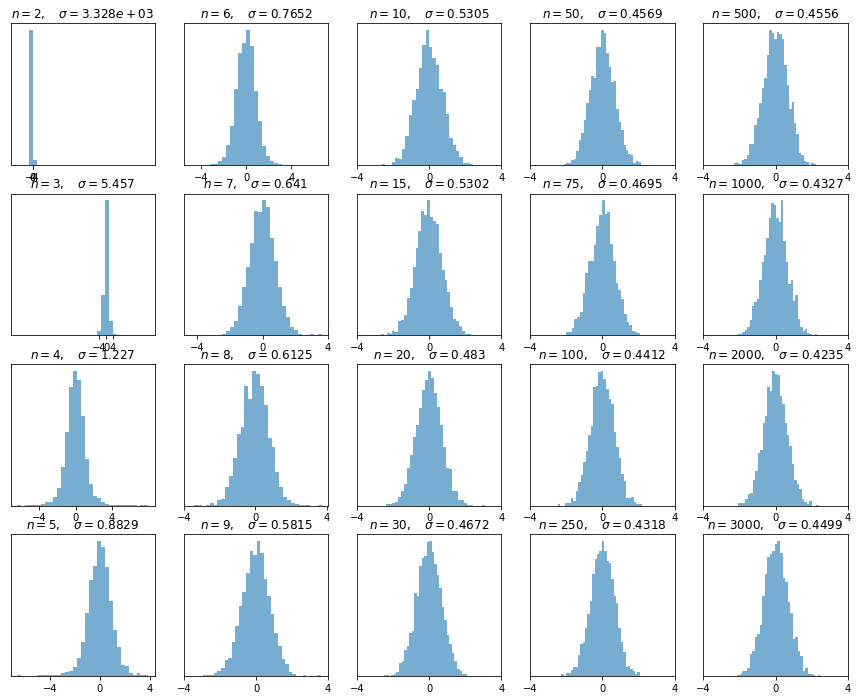

In [175]:
num_rows, num_cols = 4, 5
SizeList = [2,3,4,5,6,7,8,9,10,15,20,30,50,75,100,250,500,1000,2000,3000]
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
for i in range(num_rows):
    for j in range(num_cols):
        index = i + 4 * j
        
        c = [0] * 2500
        for k in range(2500):
            X = np.random.uniform(low = 0.0, high = 12.0, size = SizeList[index]) 
            u = np.random.uniform(low = -4.0, high = 4.0, size = SizeList[index]) 
            y = 3 + 2 * X + u
            dataset = pd.DataFrame({'X': X})
            dataset["ones"] = 1
            beta_hat = np.linalg.inv( np.transpose(dataset) @ dataset ) @ np.transpose(dataset) @ y 
            c[k] = (beta_hat[0] - 2) * np.sqrt(SizeList[index])
                
        axes[i,j].hist(c, alpha = 0.6, bins = 33)
        t = f'$n = {SizeList[index]}, \quad \sigma = {np.var(c):.4}$'
        axes[i,j].set(title = t, xticks = [-4, 0, 4], yticks = [])

plt.show()

(h) What happens to the reported values in (f) and the histogram in (g) as *n* grows large? Discuss.

**(f) The variance of $\hat \beta_{OLS,n}$ get smaller as $n$ increases.**

**(g) The histogram gets closer to the limiting Normal distribution.**